In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
font = {'size'   : 30}
mpl.rc('font', **font)

In [2]:
df = pd.read_csv("./bases/suicide/master.csv") 
filtro = df.year > 1999
filtro2 = df.year < 2016
df = df[filtro & filtro2]
df = df.groupby(['country','year','age','sex'], as_index=False)['suicides_no','population'].sum()
df = df.set_index(['country','year','age','sex'])
df = df.reindex( pd.MultiIndex.from_product([df.index.levels[0],df.index.levels[1],df.index.levels[2],df.index.levels[3]], names=['country', 'year','age','sex']),fill_value=np.nan).reset_index()
func = lambda x:x.suicides_no.isna()
series = df[func].reset_index().groupby(['country','sex'])['year'].count()
lista = list(series[series > 30].index)
filtro3 = df.country.isin(lista)
df = df[~filtro3]
def limpa_idade(age):
    return age[:-6]
df['age'] = df['age'].apply(limpa_idade)

In [3]:
def preenche_nan(df):
    rdfs= pd.melt(df.pivot_table('suicides_no', ['country','sex'], 'year')
    .interpolate(method='linear',limit_direction='both', axis=1).reset_index(),
    id_vars=["country",'sex'], var_name="year", value_name="suicides")
    rdfp = pd.melt(df.pivot_table('population', ['country','sex'], 'year')
    .interpolate(method='linear',limit_direction='both', axis=1).reset_index(),
    id_vars=["country",'sex'], var_name="year", value_name="population")
    result = rdfs.merge(rdfp).sort_values(['country','year']).reset_index(drop=True)
    result['suicide100'] = (result['suicides'] * 100000 ) / result['population']
    return result

listadffeminino = []

df1f = preenche_nan(df[(df.age == '5-14') & (df.sex == 'female')])
df2f = preenche_nan(df[(df.age == '15-24') & (df.sex == 'female')])
df3f = preenche_nan(df[(df.age == '25-34') & (df.sex == 'female')])
df4f = preenche_nan(df[(df.age == '35-54') & (df.sex == 'female')])
df5f = preenche_nan(df[(df.age == '55-74') & (df.sex == 'female')])
df6f = preenche_nan(df[(df.age == '75+') & (df.sex == 'female')])
df1m = preenche_nan(df[(df.age == '5-14') & (df.sex == 'male')])
df2m = preenche_nan(df[(df.age == '15-24') & (df.sex == 'male')])
df3m = preenche_nan(df[(df.age == '25-34') & (df.sex == 'male')])
df4m = preenche_nan(df[(df.age == '35-54') & (df.sex == 'male')])
df5m = preenche_nan(df[(df.age == '55-74') & (df.sex == 'male')])
df6m = preenche_nan(df[(df.age == '75+') & (df.sex == 'male')])

df1fw = df1f.groupby('year').agg(np.sum).reset_index()
df1fw['suicide100'] = (df1fw['suicides'] * 100000 ) / df1fw['population']
df2fw = df2f.groupby('year').agg(np.sum).reset_index()
df2fw['suicide100'] = (df2fw['suicides'] * 100000 ) / df2fw['population']
df3fw = df3f.groupby('year').agg(np.sum).reset_index()
df3fw['suicide100'] = (df3fw['suicides'] * 100000 ) / df3fw['population']
df4fw = df4f.groupby('year').agg(np.sum).reset_index()
df4fw['suicide100'] = (df4fw['suicides'] * 100000 ) / df4fw['population']
df5fw = df5f.groupby('year').agg(np.sum).reset_index()
df5fw['suicide100'] = (df5fw['suicides'] * 100000 ) / df5fw['population']
df6fw = df6f.groupby('year').agg(np.sum).reset_index()
df6fw['suicide100'] = (df6fw['suicides'] * 100000 ) / df6fw['population']
df1mw = df1m.groupby('year').agg(np.sum).reset_index()
df1mw['suicide100'] = (df1mw['suicides'] * 100000 ) / df1mw['population']
df2mw = df2m.groupby('year').agg(np.sum).reset_index()
df2mw['suicide100'] = (df2mw['suicides'] * 100000 ) / df2mw['population']
df3mw = df3m.groupby('year').agg(np.sum).reset_index()
df3mw['suicide100'] = (df3mw['suicides'] * 100000 ) / df3mw['population']
df4mw = df4m.groupby('year').agg(np.sum).reset_index()
df4mw['suicide100'] = (df4mw['suicides'] * 100000 ) / df4mw['population']
df5mw = df5m.groupby('year').agg(np.sum).reset_index()
df5mw['suicide100'] = (df5mw['suicides'] * 100000 ) / df5mw['population']
df6mw = df6m.groupby('year').agg(np.sum).reset_index()
df6mw['suicide100'] = (df6mw['suicides'] * 100000 ) / df6mw['population']

In [4]:
dfMasculino = df1mw[['year','suicide100']].copy()
dfMasculino.rename(columns={'suicide100':'suicidio514'},inplace=True)
dfMasculino['suicidio1524'] = df2mw['suicide100']
dfMasculino['suicidio2534'] = df3mw['suicide100']
dfMasculino['suicidio3554'] = df4mw['suicide100']
dfMasculino['suicidio5574'] = df5mw['suicide100']
dfMasculino['suicidio75'] = df6mw['suicide100']
dfMasculino.reset_index(drop=True).to_csv("./bases/suicide/suicidioMasculinoGlobal.csv",index=False)

In [5]:
dfFeminino = df1fw[['year','suicide100']].copy()
dfFeminino.rename(columns={'suicide100':'suicidio514'},inplace=True)
dfFeminino['suicidio1524'] = df2fw['suicide100']
dfFeminino['suicidio2534'] = df3fw['suicide100']
dfFeminino['suicidio3554'] = df4fw['suicide100']
dfFeminino['suicidio5574'] = df5fw['suicide100']
dfFeminino['suicidio75'] = df6fw['suicide100']
dfFeminino.reset_index(drop=True).to_csv("./bases/suicide/suicidioFemininoGlobal.csv",index=False)

In [6]:
df2 = pd.read_csv("./bases/wdi/CountryAjustado.csv")

In [7]:
dfMasculino = df1m[['country','year','suicide100']].copy()
dfMasculino.rename(columns={'suicide100':'suicidio514'},inplace=True)
dfMasculino['suicidio1524'] = df2m['suicide100']
dfMasculino['suicidio2534'] = df3m['suicide100']
dfMasculino['suicidio3554'] = df4m['suicide100']
dfMasculino['suicidio5574'] = df5m['suicide100']
dfMasculino['suicidio75'] = df6m['suicide100']
dfMasculino = pd.merge(dfMasculino,df2)
dfMasculino.rename(columns={'coyntrycode':'countrycode'},inplace=True)
dfMasculino.reset_index(drop=True).to_csv("./bases/suicide/suicidioMasculino.csv",index=False)

In [8]:
dfFeminino = df1f[['country','year','suicide100']].copy()
dfFeminino.rename(columns={'suicide100':'suicidio514'},inplace=True)
dfFeminino['suicidio1524'] = df2f['suicide100']
dfFeminino['suicidio2534'] = df3f['suicide100']
dfFeminino['suicidio3554'] = df4f['suicide100']
dfFeminino['suicidio5574'] = df5f['suicide100']
dfFeminino['suicidio75'] = df6f['suicide100']
dfFeminino = pd.merge(dfFeminino,df2)
dfFeminino.rename(columns={'coyntrycode':'countrycode'},inplace=True)
dfFeminino.reset_index(drop=True).to_csv("./bases/suicide/suicidiofeminino.csv",index=False)

Text(0, 0.5, 'suicidio por 100.000')

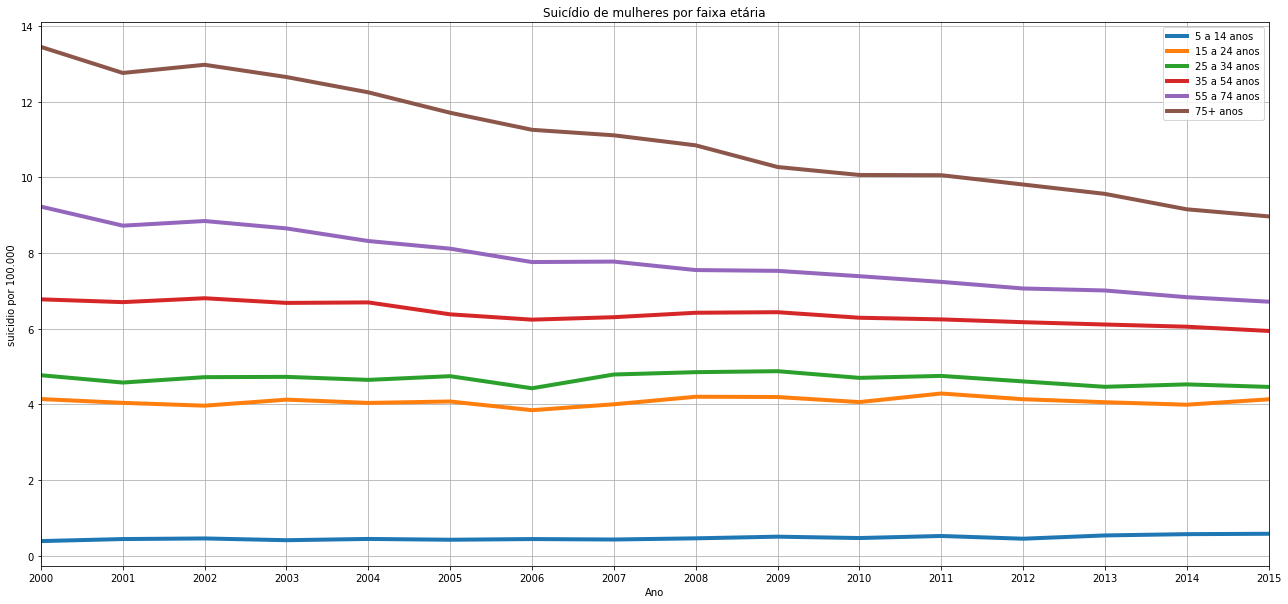

In [9]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_title("Suicídio de mulheres por faixa etária")
df1fw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,yticks=range(26,-2,-2),label='5 a 14 anos')
df2fw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,xticks=range(2000,2016), label='15 a 24 anos')
df3fw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,label='25 a 34 anos')
df4fw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True, label='35 a 54 anos')
df5fw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,label='55 a 74 anos')
df6fw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True, label='75+ anos')
ax.set_xlabel("Ano")
ax.set_ylabel("suicidio por 100.000")

Text(0, 0.5, 'suicidio por 100.000')

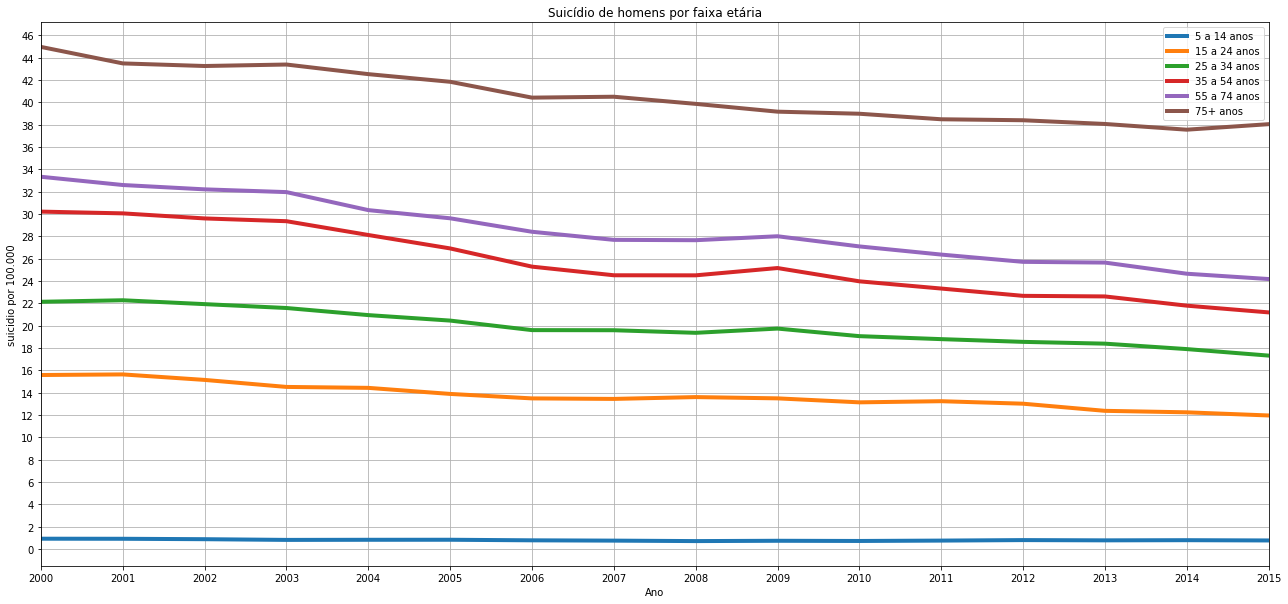

In [10]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_title("Suicídio de homens por faixa etária")
df1mw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,yticks=range(46,-2,-2),label='5 a 14 anos')
df2mw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,xticks=range(2000,2016), label='15 a 24 anos')
df3mw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,label='25 a 34 anos')
df4mw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True, label='35 a 54 anos')
df5mw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,label='55 a 74 anos')
df6mw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True, label='75+ anos')
ax.set_xlabel("Ano")
ax.set_ylabel("suicidio por 100.000")